# Average Calories on Meals

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [150]:
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [151]:
dff = df.copy()
dff['Item'] = dff['Item'].str.lower()
dff.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,egg mcmuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,egg white delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,sausage mcmuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,sausage mcmuffin with egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,sausage mcmuffin with egg whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [152]:
dff['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [153]:
df_meals = dff[['Category', 'Calories']]
df_meals = df_meals.groupby(['Category'],as_index=False).mean()
df_meals

,Category,Calories
0,Beef & Pork,494.000000
1,Beverages,113.703704
2,Breakfast,526.666667
3,Chicken & Fish,552.962963
4,Coffee & Tea,283.894737
5,Desserts,222.142857
6,Salads,270.000000
7,Smoothies & Shakes,531.428571
8,Snacks & Sides,245.769231


In [165]:
beef = df[df['Category'].str.contains('Beef & Pork')]
beef = pd.DataFrame({'Category': beef.Category, 'Calories': beef.Calories})
avg_beef = beef.Calories.mean(axis=0)
breakfast = df[df['Category'].str.contains('Breakfast')]
breakfast_cal = pd.DataFrame({'Category': breakfast.Category, 'Calories': breakfast.Calories})
avg_breakfast = breakfast_cal.Calories.mean(axis=0)
chicken = df[df['Category'].str.contains('Chicken & Fish')]
chicken = pd.DataFrame({'Category': chicken.Category, 'Calories': chicken.Calories})
avg_chicken = chicken.Calories.mean(axis=0)
deserts = df[df['Category'].str.contains('Desserts')]
deserts = pd.DataFrame({'Category': deserts.Category, 'Calories': deserts.Calories})
avg_deserts = deserts.Calories.mean(axis=0)
salads = df[df['Category'].str.contains('Salads')]
salads = pd.DataFrame({'Category': salads.Category, 'Calories': salads.Calories})
avg_salads = salads.Calories.mean(axis=0)
snacks = df[df['Category'].str.contains('Snacks & Sides')]
snacks = pd.DataFrame({'Category': snacks.Category, 'Calories': snacks.Calories})
avg_snacks = snacks.Calories.mean(axis=0)

avg_beef

494.0

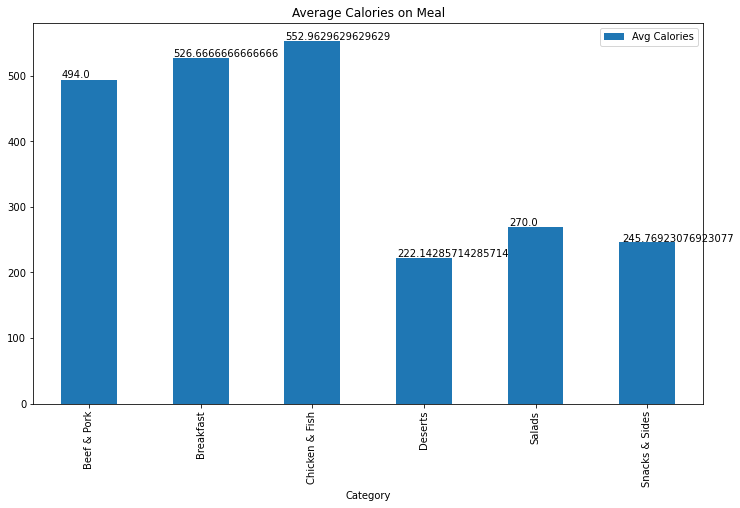

In [177]:
avg_cal = pd.DataFrame({'Category':['Beef & Pork', 'Breakfast','Chicken & Fish', 'Deserts', 'Salads', 'Snacks & Sides'], 'Avg Calories': [avg_beef,avg_breakfast,avg_chicken,avg_deserts,avg_salads,avg_snacks]})
ax = avg_cal.plot.bar(x = 'Category', y = 'Avg Calories', figsize=(12,7))
ax.set_title("Average Calories on Meal")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))